<a href="https://colab.research.google.com/github/RodolfoFigueroa/madi2024/blob/main/Unidad_1/05_NetworkX_para_graficas_planares_y_dirigidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

En esta sesión veremos cómo trabajar aspectos de planaridad y gráficas dirigidas usando la librería NetworkX.

# DFS y BFS

Como las gráficas ahora son dirigidas, hay que tomar en consideración la dirección de las aristas si queremos recorrerlas con DFS o BFS. Por suerte, en el caso de gráficas dirigidas, `g.adj[i]` solo regresa los vértices sucesores de `i`:

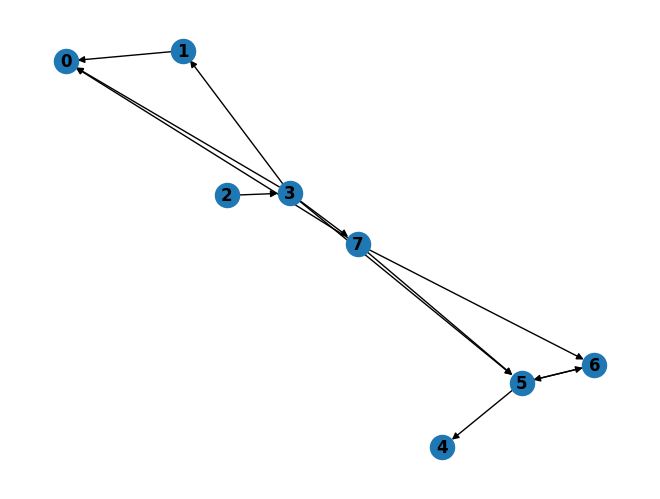

In [ ]:
G = nx.gnp_random_graph(8, 0.2, directed=True)
nx.draw(G, with_labels=True, font_weight='bold')

In [ ]:
print(f"Vértices adyacentes a 0: {G.adj[0]}")

Vértices adyacentes a 0: {1: {}, 3: {}, 4: {}, 5: {}}


De esta manera, podemos utilizar los algoritmos de DFS y BFS que escribimos en libretas pasadas sin hacer ningún cambio:

In [ ]:
def dfs(g, v, visited=None):
    if visited is None:
        visited = [False] * len(g.nodes)
        y
    visited[v] = True
    print(v)
    for u in g.adj[v]:
        if not visited[u]:
            dfs(g, u, visited)


def bfs(g, v):
    visited = [False] * len(g.nodes)
    q = deque()
    visited[v] = True
    q.append(v)

    while(q):
        u = q.popleft()
        print(u)
        for w in g.adj[u]:
            if not visited[w]:
                visited[w] = True
                q.append(w)

# Propiedades

`networkx` tiene varias funciones para obtener distintas propiedades de las gráficas:

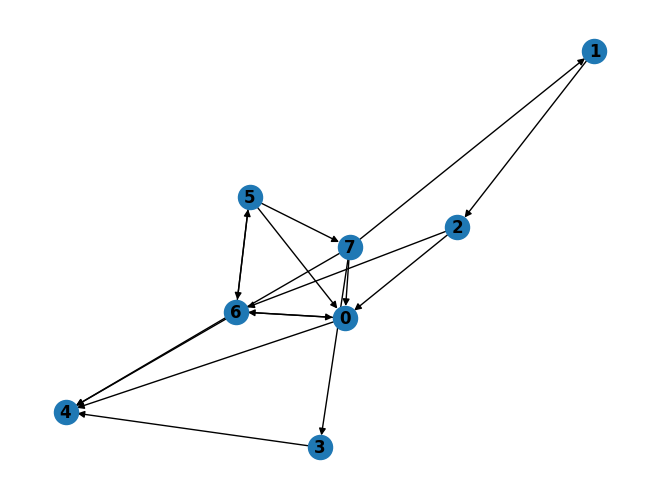

In [ ]:
G = nx.gnp_random_graph(8, 0.2, directed=True)
nx.draw(G, with_labels=True, font_weight='bold')

In [ ]:
print(
f"""Los vértices de la digráfica son : {G.nodes}
Las aristas de la digráfica son: {G.edges}
Lista de los ingrados por cada vértice: {G.in_degree}
Lista de los exgrados por cada vértice: {G.out_degree}
Ingrado de un vértice en particular: {G.in_degree[1]}
Lista de vértices ex-vecinos  1: {list(G.successors(1))}
Lista de vértices ex-vecinos a 1, con atributos: {G.adj[1]}
Lista de flechas que entran a 2: {G.in_edges(2)}
Lista de in-vecinos de 2: {list(G.predecessors(2))}"""
)

Los vértices de la digráfica son : [0, 1, 2, 3, 4, 5, 6, 7]
Las aristas de la digráfica son: [(0, 4), (0, 6), (1, 2), (2, 0), (2, 6), (3, 4), (5, 0), (5, 6), (5, 7), (6, 0), (6, 4), (6, 5), (7, 0), (7, 1), (7, 3), (7, 4)]
Lista de los ingrados por cada vértice: [(0, 4), (1, 1), (2, 1), (3, 1), (4, 4), (5, 1), (6, 3), (7, 1)]
Lista de los exgrados por cada vértice: [(0, 2), (1, 1), (2, 2), (3, 1), (4, 0), (5, 3), (6, 3), (7, 4)]
Ingrado de un vértice en particular: 1
Lista de vértices ex-vecinos  1: [2]
Lista de vértices ex-vecinos a 1, con atributos: {2: {}}
Lista de flechas que entran a 2: [(1, 2)]
Lista de in-vecinos de 2: [1]


# Accesibilidad y conexidad

Decimos que un vértice $v$ es **accesible** desde $u$ si existe un camino *dirigido* entre $u$ y $v$. Es importante notar dos cosas:

1. $u$ y $v$ pueden estar en la misma componente conexa, pero no ser accesibles uno desde el otro.

2. Que $v$ sea accesible desde $u$ no implica lo inverso.

A continuación, demostramos dos gráficas que ilustran estos puntos:

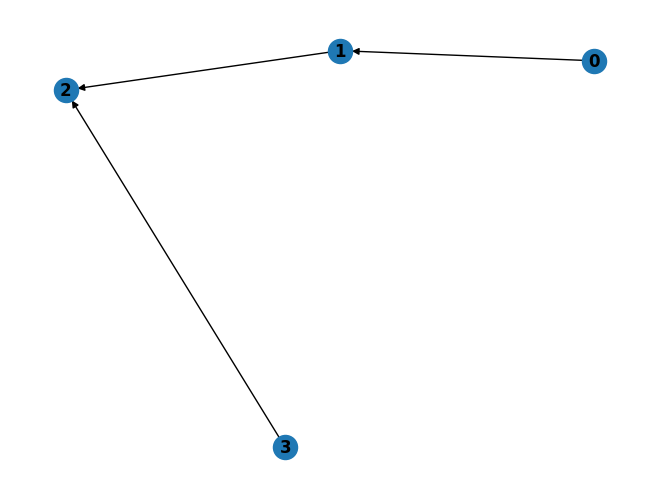

In [ ]:
g = nx.DiGraph()
g.add_edges_from([(0,1), (1,2), (3,2)])
nx.draw(g, with_labels=True, font_weight='bold')

Podemos ver que todos los vértices están conectados, pero 0 no es accesible desde 3, y viceversa.

Por otro lado:

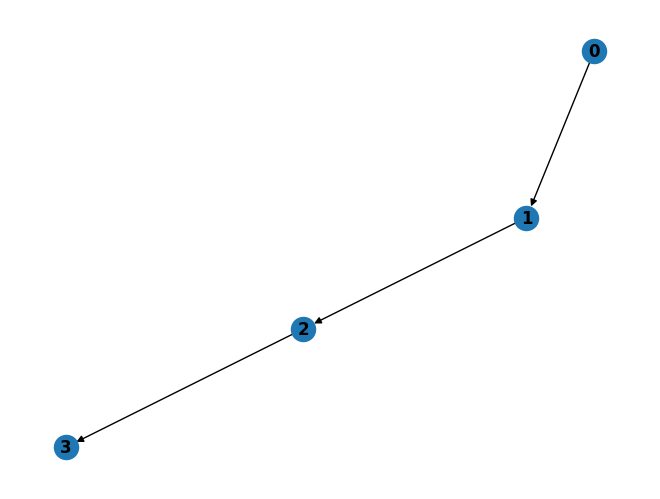

In [ ]:
g = nx.DiGraph()
g.add_edges_from([(0,1), (1,2), (2,3)])
nx.draw(g, with_labels=True, font_weight='bold')

3 es accesible desde 0, pero no lo opuesto.

Se dice que $u$ y $v$ están *fuertemente conectados* si $u$ es accesible desde $v$, y $v$ desde $u$. Si cada par de vértices de una gráfica está fuertemente conectado, se dice que la gráfica entera es fuertemente conexa.

Para determinar si $v$ es accesible desde $u$, basta con hacer DFS usando $u$ como el nodo raíz. Si eventualmente visitamos a $v$, significa que sí lo es:

In [ ]:
def is_reachable(g, inicial, final, visited = None):
    if visited is None:
        visited = [False] * len(g.nodes)
    visited[inicial] = True
    for u in g.adj[inicial]:
      if visited[final]:
        return True
      if not visited[u]:
        is_reachable(g, u, final, visited)
    return visited[final]


Usando nuestra gráfica anterior:

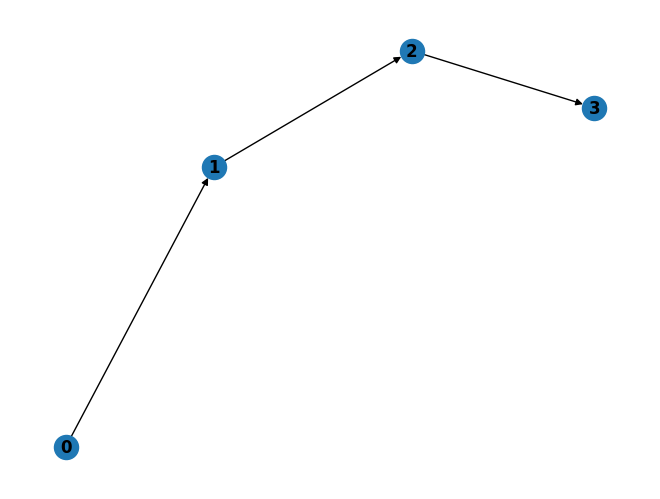

In [ ]:
g = nx.DiGraph()
g.add_edges_from([(0,1), (1,2), (2,3)])
nx.draw(g, with_labels=True, font_weight='bold')

In [ ]:
print(f"3 es accesible desde 0: {is_reachable(g, 0, 3)}")
print(f"0 es accesible desde 3: {is_reachable(g, 3, 0)}")

3 es accesible desde 0: True
0 es accesible desde 3: False


# Ordenamientos topológicos

Un ordenamiento topológico de los vértices de una gráfica dirigida cumple que, si existe una flecha del vértice $u$ al vértice $v$, entonces $u$ viene antes de $v$ en el ordenamiento.

Por ejemplo, tomando la siguiente gráfica:

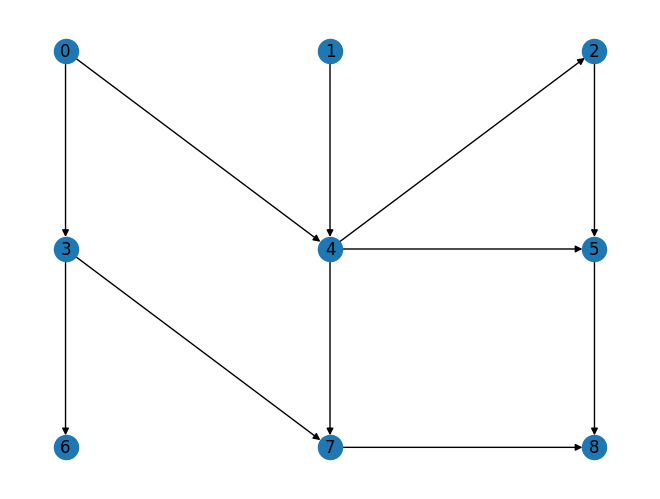

In [ ]:
g = nx.DiGraph()
g.add_nodes_from([0,1,2,3,4,5,6,7,8])
g.add_edges_from([(0, 4), (0, 3), (2, 5), (1, 4), (4, 5), (3, 6), (4, 7), (3, 7), (4, 2), (5, 8), (7, 8)])
pos = {i: (i%3, 3-i//3*3) for i in g.nodes}
nx.draw(g, with_labels=True, pos=pos)

Algunos ordenamientos posibles son:

* 1, 0, 3, 6, 4, 2, 5, 7, 8
* 0, 1, 3, 4, 6, 7, 2, 5, 8
* 0, 3, 6, 1, 4, 2, 5, 7, 8

Una manera sencilla de comprobar si un ordenamiento es válido es colocar a todos los vértices en una fila, siguiendo el ordenamiento de izquierda a derecha. Si todas las aristas apuntan hacia la derecha, entonces es válido.

Definimos una pequeña función para generar un arreglo de posiciones para graficar dado un posible ordenamiento:

In [ ]:
def pos_order(order):
    pos = {}
    for i, v in enumerate(order):
        pos[v] = (i,5)
    return pos

Aplicándolo a nuestros ordenamientos:

In [ ]:
sorts = [
    [1, 0, 3, 6, 4, 2, 5, 7, 8],
    [0, 1, 3, 4, 6, 7, 2, 5, 8],
    [0, 3, 6, 1, 4, 2, 5, 7, 8]
]

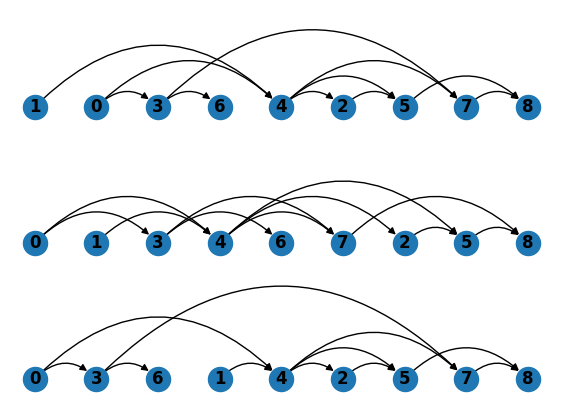

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(7, 5))
for i in range(3):
    pos = pos_order(sorts[i])
    #print(pos)
    nx.draw(g, pos=pos, connectionstyle="arc3,rad=-0.5", with_labels=True, font_weight='bold', ax=ax[i])
    ax[i].margins(0, 0.2)

Aplicándolo a un ordenamiento inválido:

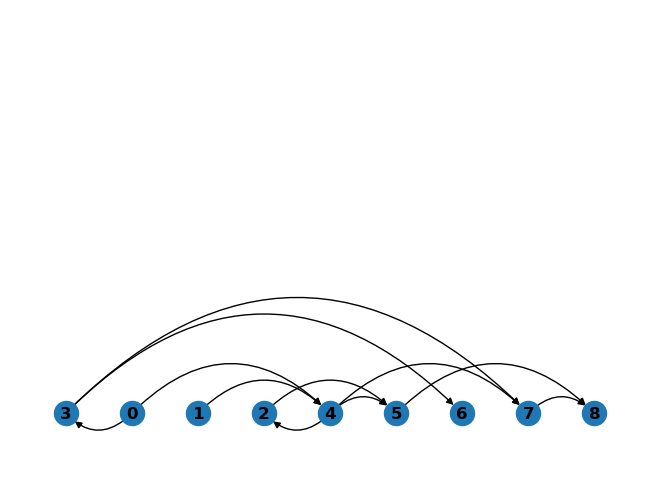

In [ ]:
pos = pos_order([3,0,1,2,4,5,6,7,8])
nx.draw(g, pos=pos, connectionstyle="arc3,rad=-0.5", with_labels=True, font_weight='bold')

## Ciclos

Supongamos que tenemos una gráfica un ciclo de la forma $0\rightarrow 1 \rightarrow 2 \rightarrow 0$. Si queremos generar un ordenamiento para esta gráfica, tendremos un problema, ya que por definición $0$ tiene que venir antes que $1$, $1$ antes que $2$, y $2$ antes que $0$, lo cual claramente no es posible.

Por lo tanto, si una gráfica es ordenable, entonces no tiene ciclos. En la siguiente sección, veremos una prueba del converso (i.e., si la gráfica no tiene ciclos entonces es ordenable).

**DAG: Directed acyclic graph**

## DFS y ordenamientos

Como DFS visita cada vértice una única vez, es un candidato natural para generar órdenes topológicos. Tres maneras de listar (no ordenar!) los vértices usándolo son las siguientes:

* **Preorder**: Visitamos a un nodo *antes* de visitar a sus hijos.

* **Postorder**: Visitamos a un nodo *después* de visitar a sus hijos.

* **Reverse postorder**: Invertimos los resultados de postorder.

Implementamos el preorder y postorder:

In [ ]:
def preorder_basic(g, v, visited=None, out=None):
    if visited is None:
        visited = [False] * len(g.nodes)
    if out is None:
        out = []

    visited[v] = True
    # Visitamos al vértice ANTES de hacer las llamadas recursivas
    out.append(v)
    for u in g.adj[v]:
        if not visited[u]:
            preorder_basic(g, u, visited, out)
    return out

def postorder_basic(g, v, visited=None, out=None):
    if visited is None:
        visited = [False] * len(g.nodes)
    if out is None:
        out = []

    visited[v] = True
    for u in g.adj[v]:
        if not visited[u]:
            postorder_basic(g, u, visited, out)
    # Visitamos al vértice DESPUÉS de hacer las llamadas recursivas
    out.append(v)
    return out

Ejecutándolos:

In [ ]:
preorder_basic(g, 0)

[0, 4, 5, 8, 7, 2, 3, 6]

In [ ]:
postorder_basic(g, 0)

[8, 5, 7, 2, 4, 6, 3, 0]

Notamos que el vértice 1 no aparece en nuestros resultados. Esto se debe a que no es accesible desde el 0. Por lo tanto, escribimos un *wrapper* para asegurarnos que visite todos los vértices:

In [ ]:
def preorder(g, v):
    visited = [False] * len(g.nodes)
    out = []
    for v in g.nodes:
      if not visited[v]:
        preorder_basic(g, v, visited, out)
    return out

def postorder(g, v):
    visited = [False] * len(g.nodes)
    out = []
    for v in g.nodes:
      if not visited[v]:
        postorder_basic(g, v, visited, out)
    return out

Volviendo a ejecutarlo:

In [ ]:
preorder(g, 0)

[0, 4, 5, 8, 7, 2, 3, 6, 1]

In [ ]:
postorder(g, 0)

[8, 5, 7, 2, 4, 6, 3, 0, 1]

Con esto, podemos escribir una función para obtener el reverse postorder:

In [ ]:
def reverse_postorder(g, v):
    out = postorder(g, v)[::-1]
    return out

In [ ]:
print(f"""Preorder: {preorder(g, 0)}
Postorder: {postorder(g, 0)}
Reverse postorder: {reverse_postorder(g, 0)}""")

Preorder: [0, 4, 5, 8, 7, 2, 3, 6, 1]
Postorder: [8, 5, 7, 2, 4, 6, 3, 0, 1]
Reverse postorder: [1, 0, 3, 6, 4, 2, 7, 5, 8]


**Proposición:** Reverse postorder genera un ordenamiento topológico para una gráfica acíclica.

**Demostración:** Observemos el código de *postorder_basic* y supongamos que se está ejecutando *postorder_basic(x)*.

Supongamos que la iteración sobre los ex-vecinos de $x$ ha terminado y $out = [v_{i_1}, ..., v_{i_j}]$.

Eso significa que los ex-vecinos de $x$ deben encontrarse forsozamente en el conjunto $\{v_{i_1}, ..., v_{i_j}\}$.
Así, al correr $out.append(x)$ terminamos con la lista
$$out = [v_{i_1}, ..., v_{i_j}, x]$$

De donde se sigue que todas las ex-flechas de $x$ apuntan a vértices detrás de él en la lista. Como esto sucede para cada vértice $x$ de la digráfica, al obtener la lista $out$ al finalizar el algoritmo, tenemos que para todo vértice $v$ se tiene que sus ex-flechas apuntan hacia atrás.

Luego entonces, *reverse(out)* es un ordenamiendo donde todas las flechas apuntan hacia adelante.

---

Comprobemos de manera gráfica que el reverse postorder efectivamente genera un ordenamiento topológico válido. Lo comparamos con las otras maneras de listar los vértices:

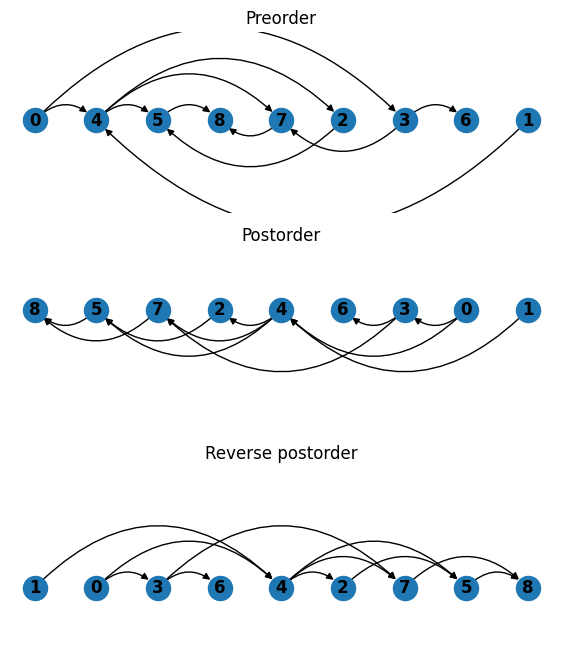

In [ ]:
lists = [preorder(g, 0), postorder(g, 0), reverse_postorder(g, 0)]
names = ["Preorder", "Postorder", "Reverse postorder"]

fig, ax = plt.subplots(3, 1, figsize=(7, 8))
for i in range(3):
    pos = pos_order(lists[i])
    nx.draw(g, pos=pos, connectionstyle="arc3,rad=-0.5", with_labels=True, font_weight='bold', ax=ax[i])
    ax[i].margins(0, 1)
    ax[i].set_title(names[i])

Notamos que tanto en el postorder como el reverse postorder, todas las flechas apuntan hacia una misma dirección. Sin embargo, hay que recordar que en un ordenamiento válido, deben de apuntar hacia la **derecha**.

# Gráficas planares

NetworkX tiene funciones ya integradas que nos permiten tanto checar si la gráfica es aplanable o no, y también nos muestra un encaje planar (del inglés, planar embedding) de la gráfica en caso de que esta sea aplanable.

Aplanable


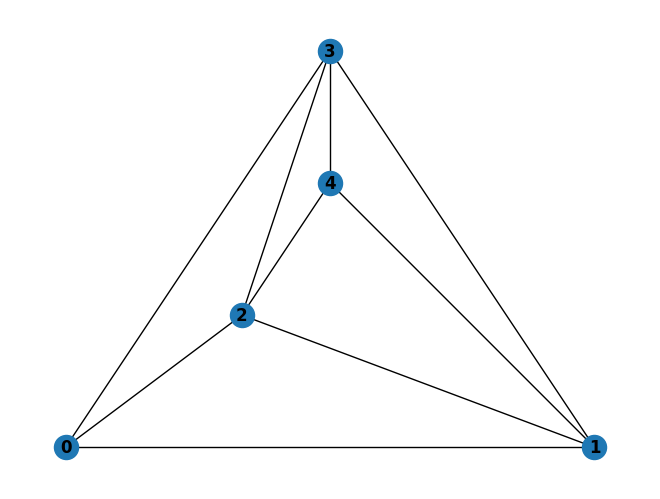

In [ ]:
a = 5
b = 0.8
PL = nx.gnp_random_graph(a, b)

if nx.check_planarity(PL)[0]:
    print("Aplanable")
    nx.draw_planar(PL, with_labels=True, font_weight='bold')
else:
    print("No es aplanable")
    nx.draw(PL, with_labels=True, font_weight='bold')

## Ejercicios

## Ejercicio 1

Escribe una función para determinar si un ordenamiento dado en forma de una lista de vértices $[v_1, v_2, \ldots, v_n]$ es un ordenamiento topológico.

Primero toma la lista de vértices propuesta (el orden) y asigna una posición a cada vértice, indicando dónde se encuentra cada uno en ese orden. Luego, el algoritmo recorre todas las aristas del grafo. Para cada arista que va de u a v, comprueba si el vértice u aparece antes que v en la lista de orden.
De modo que si en alguna arista se encuentra que el vértice u aparece después (o en la misma posición) que v en el orden, se concluye que el orden propuesto no es válido y el algoritmo devuelve False. Si todas las aristas cumplen la condición, el orden es correcto y el algoritmo devuelve True.

In [ ]:
import networkx as nx

def es_orden_topologico(grafo, orden):
    # Crear un diccionario que almacene la posición de cada vértice en el orden dado
    posicion = {v: i for i, v in enumerate(orden)}
    for u, v in grafo.edges():
        if posicion[u] >= posicion[v]:
            return False

    # Si no se violó ninguna condición, el orden es un ordenamiento topológico válido
    return True

# Ejemplo de uso:
grafo = nx.DiGraph([(1, 2), (1, 3), (2, 4), (3, 4)])
orden = [1, 2, 3, 4]

print(es_orden_topologico(grafo, orden))


True


## Ejercicio 2

Como vimos anteriormente, una DAG (gráfica dirigida acíclica) puede tener múltiples ordenamientos topológicos. Escribe una función que determine si una DAG tiene un único ordenamiento. Compara tu resultado con lo obtenido con `nx.all_topological_sorts`.

Cremos dos funciones:


*   es_ordenamiento_topologico_unico: Determina si un grafo dirigido acíclico
(DAG) tiene un único ordenamiento topológico.
Donde primero se calcula el grado de entrada para cada vértice del grafo. Los vértices con grado de entrada 0 se agregan a una cola para ser procesados.Se procesa cada vértice de la cola y se reduce el grado de entrada de sus vecinos. Si en cualquier punto hay más de un vértice en la cola, se sabe que hay más de un posible ordenamiento topológico, por lo que la función retorna False.Si se procesan todos los vértices y nunca hubo más de un vértice en la cola simultáneamente, entonces existe un único ordenamiento topológico, y la función retorna True.


*   comparar_con_networkx: Compara los resultados de la función anterior con el método all_topological_sorts de la librería networkx, que genera todos los ordenamientos topológicos posibles de un DAG. Para este se llama a la función es_ordenamiento_topologico_unico para verificar si el grafo tiene un único ordenamiento topológico.Ademas utiliza la función all_topological_sorts de networkx para obtener todos los ordenamientos topológicos posibles y se cuenta cuántos hay.Finalmente, se imprime si el grafo tiene un único ordenamiento topológico según ambas funciones y se muestran algunos ejemplos de ordenamientos topológicos si hay más de uno.

In [ ]:
from collections import deque

def es_ordenamiento_topologico_unico(grafo):
    """
    Determina si un grafo dirigido acíclico (DAG) tiene un único ordenamiento topológico.

    Parámetros:
    grafo (dict): Un diccionario que representa el grafo dirigido, donde las claves son los vértices
                  y los valores son listas de vértices adyacentes (vecinos alcanzables desde ese vértice).

    Retorna:
    bool: True si el DAG tiene un único ordenamiento topológico, False si hay múltiples ordenamientos.
    """
    grado_entrada = {v: 0 for v in grafo}
    for v in grafo:
        for vecino in grafo[v]:
            grado_entrada[vecino] += 1

    # Cola para el proceso de ordenamiento topológico
    cola = deque([v for v in grafo if grado_entrada[v] == 0])

    ordenamiento = []

    while cola:
        if len(cola) > 1:
            return False

        actual = cola.popleft()
        ordenamiento.append(actual)

        # Reducir el grado de entrada de los vecinos
        for vecino in grafo[actual]:
            grado_entrada[vecino] -= 1
            if grado_entrada[vecino] == 0:
                cola.append(vecino)

    # Si hemos procesado todos los vértices, entonces hay un único ordenamiento
    return len(ordenamiento) == len(grafo)

In [ ]:
import networkx as nx

def comparar_con_networkx(grafo):
    """
    Compara el resultado de la función es_ordenamiento_topologico_unico con networkx.all_topological_sorts.

    Parámetros:
    grafo (dict): Un diccionario que representa el grafo dirigido.

    Retorna:
    None: Imprime los resultados de la comparación.
    """
    G = nx.DiGraph(grafo)
    unico = es_ordenamiento_topologico_unico(grafo)

    # Obtener todos los ordenamientos topológicos con NetworkX
    todos_ordenamientos = list(nx.all_topological_sorts(G))

    print(f"¿Un solo ordenamiento topológico? {'Sí' if unico else 'No'}")
    print(f"Número de ordenamientos topológicos con networkx: {len(todos_ordenamientos)}")

    if len(todos_ordenamientos) > 1:
        print("Ejemplos de ordenamientos topológicos:")
        for orden in todos_ordenamientos[:3]:  # Mostramos hasta 3 ejemplos
            print(orden)


In [ ]:
grafo = {
    'A': ['B', 'C'],
    'B': ['D'],
    'C': ['D'],
    'D': []
}

comparar_con_networkx(grafo)


¿Un solo ordenamiento topológico? No
Número de ordenamientos topológicos con networkx: 2
Ejemplos de ordenamientos topológicos:
['A', 'C', 'B', 'D']
['A', 'B', 'C', 'D']
